# To test out wide to long in pandas

- Read the data from HandBookData.xlsx
- read only the required cells [A1:AB1827]
- change from wide to long using pandas functionality.
- Use the statistics obtained from test1 notebook
- Write a model using SVR using multiple variables.
- Look for a way to tune the model

In [1]:
import pandas as pd
import numpy as np
import openpyxl
from datetime import datetime, timedelta
from os.path import join, splitext

In [2]:
data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLLoad', engine='openpyxl', usecols='A:AB', nrows=1826)

data.sample(5)

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
942,Summer,8,Saturday,2015-08-01,1880,1732.0,1632.0,1555,1520,1516,...,2307,2356,2402,2425,2403,2327,2204,2158,2015,1840
1514,Winter,2,Thursday,2017-02-23,1591,1548.0,1514.0,1514,1542,1655,...,1948,1910,1902,1941,1988,2006,1967,1881,1768,1639
890,Summer,6,Wednesday,2015-06-10,1706,1607.0,1540.0,1506,1518,1599,...,2693,2733,2796,2815,2784,2720,2632,2596,2439,2215
887,Summer,6,Sunday,2015-06-07,1491,1390.0,1329.0,1293,1290,1289,...,2081,2136,2198,2213,2232,2231,2216,2256,2154,1997
677,Fall,11,Sunday,2014-11-09,1525,1486.0,1459.0,1458,1475,1506,...,1640,1633,1689,1840,1903,1900,1857,1790,1706,1644


In [3]:
data.head()

,Season,Month,DOW,DT,HR1,HR2,HR3,HR4,HR5,HR6,...,HR15,HR16,HR17,HR18,HR19,HR20,HR21,HR22,HR23,HR24
0,Winter,1,Tuesday,2013-01-01,1723,1674.0,1622.0,1595,1591,1629,...,1900,1906,1934,2089,2184,2173,2149,2084,2005,1934
1,Winter,1,Wednesday,2013-01-02,1874,1846.0,1851.0,1865,1921,2067,...,2307,2285,2307,2468,2564,2555,2507,2443,2323,2204
2,Winter,1,Thursday,2013-01-03,2141,2105.0,2076.0,2094,2133,2254,...,2314,2287,2305,2444,2527,2489,2439,2350,2227,2087
3,Winter,1,Friday,2013-01-04,1989,1942.0,1897.0,1907,1955,2086,...,2225,2188,2204,2325,2435,2404,2366,2293,2185,2060
4,Winter,1,Saturday,2013-01-05,1961,1914.0,1879.0,1880,1897,1967,...,1944,1961,2005,2104,2169,2125,2086,2017,1931,1825


In [4]:
long_data = pd.wide_to_long(data, stubnames='HR', i=['Season','Month','DT','DOW'], j='hour')

long_data.sample(5)

HR
Season Month DT         DOW      hour        
Spring 3     2015-03-29 Sunday   16    1766.0
       5     2016-05-08 Sunday   11    1491.0
Winter 12    2013-12-19 Thursday 5     1942.0
       2     2016-02-19 Friday   15    2006.0
Spring 3     2016-03-17 Thursday 23    1839.0

In [5]:
long_data.reset_index(inplace=True)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR
24507,Fall,10,2015-10-19,Monday,4,1554.0
12432,Summer,6,2014-06-03,Tuesday,1,1886.0
19685,Spring,4,2015-04-01,Wednesday,6,1860.0
25658,Winter,12,2015-12-06,Sunday,3,1679.0
28646,Spring,4,2016-04-08,Friday,15,2125.0


Lets make some plots
- data from 2017 during seasons at hour 1

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.constants import golden as phi

<AxesSubplot:xlabel='hour', ylabel='HR'>

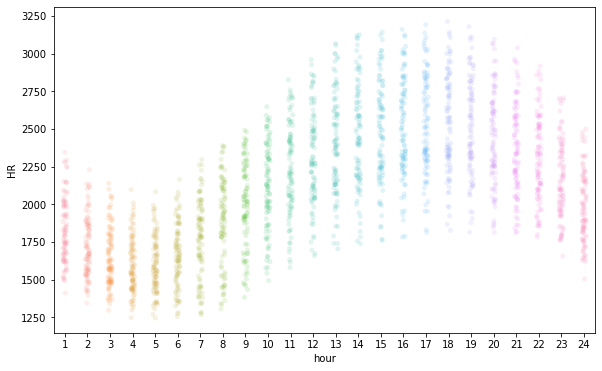

In [7]:
data = long_data.loc[(long_data['DT'].dt.year == 2017) & (long_data['Season'] == 'Summer')]

height = 6
fig = plt.figure(figsize=(phi * height,height))
sns.stripplot(data = data, x='hour', y='HR',alpha=0.15)

- Turn values into categorical

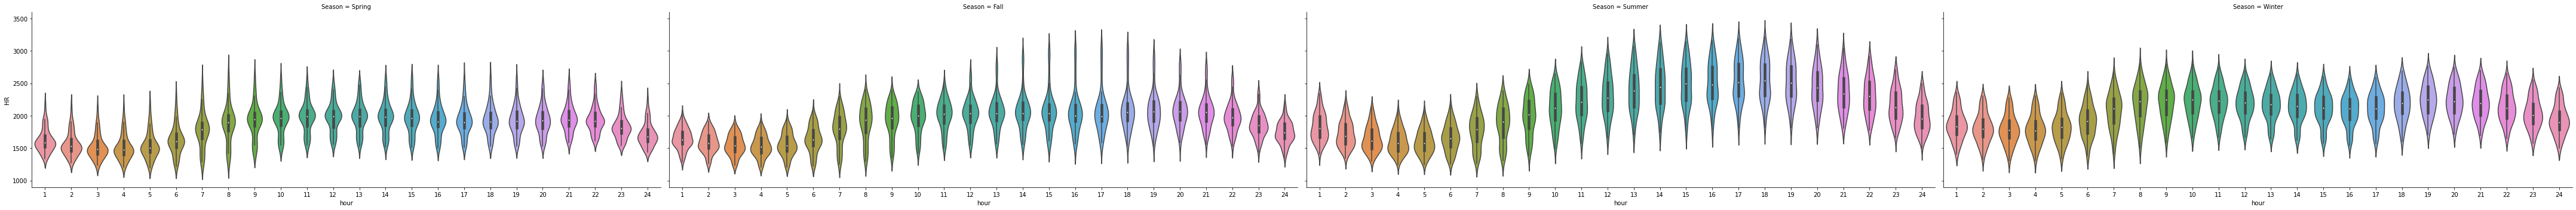

In [8]:
data = long_data.loc[(long_data['DT'].dt.year == 2017)]

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

**2017 Sesonal trend**

We can see that in 2017 Spring and Fall have quite consistent points, they are clustered close to each other. On the other hand Summer and Winter data is quite scattered. 

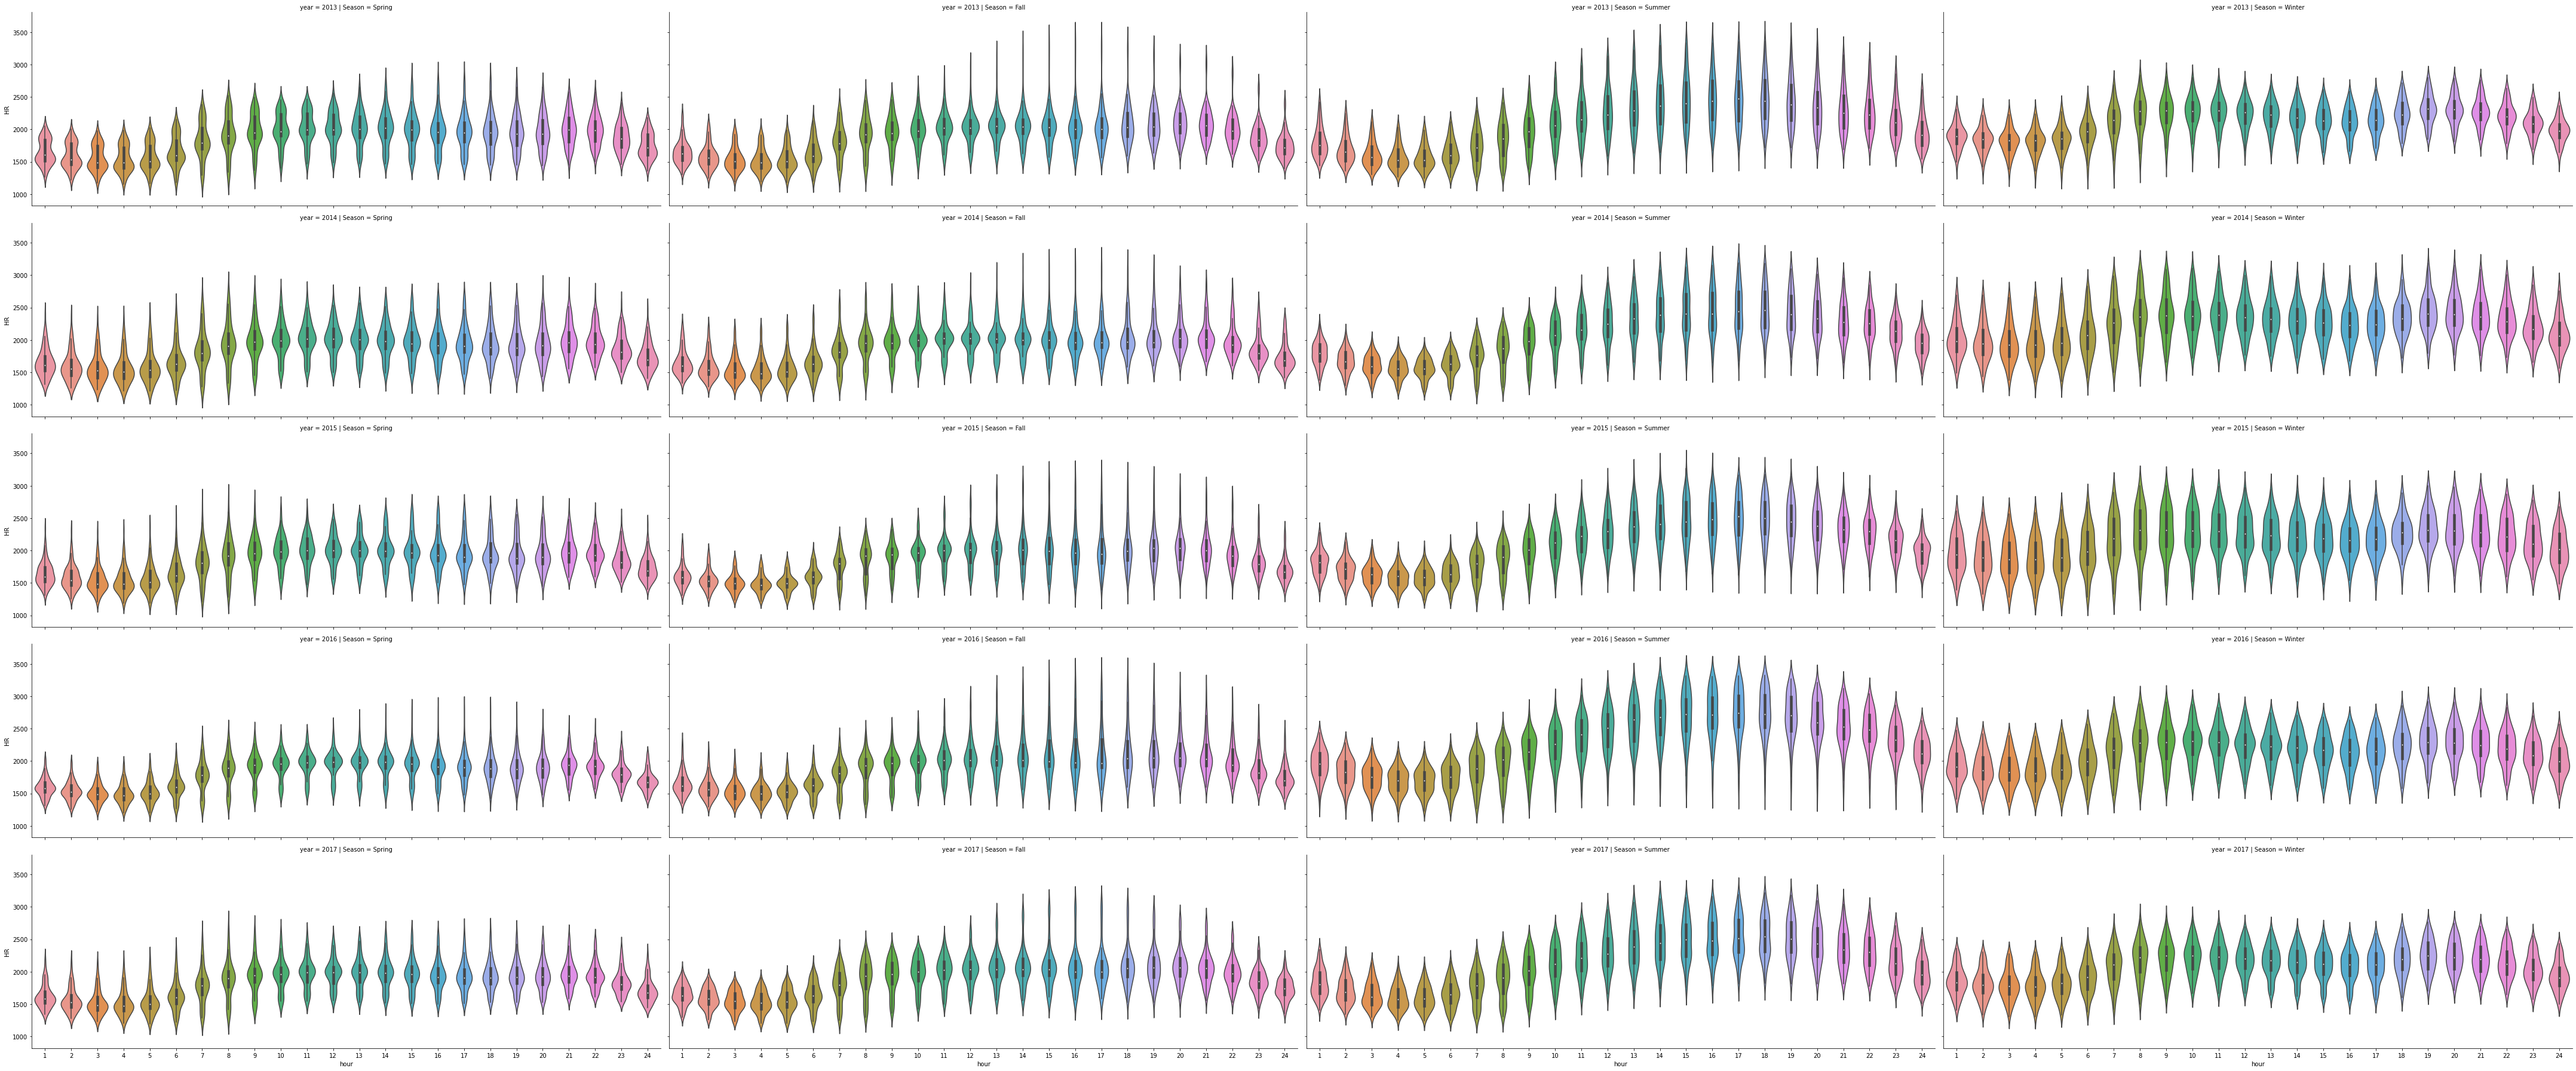

In [9]:
data = long_data.copy(deep=True)

data['year'] = data['DT'].dt.year

sns.catplot(data = data, x='hour', y='HR',alpha=0.15, col='Season', row='year', kind='violin', aspect=3, col_order=['Spring','Fall','Summer','Winter'])

We can see that for all the years the hourly load in spring and fall is quite consistent over all the days while just like 2017, the hourly load in summer and winter is quite spread out.

In [10]:
long_data['Season'] = long_data['Season'].astype('category')

In [11]:
labels = ['Night', 'Day', 'Day','Night']

long_data['TimeOfDay'] = pd.cut(long_data['hour'].values, bins=range(0,25,6), right=True, labels = labels, ordered=False)

long_data.sample(5)

,Season,Month,DT,DOW,hour,HR,TimeOfDay
32556,Fall,9,2016-09-18,Sunday,13,2144.0,Day
26278,Winter,12,2015-12-31,Thursday,23,1851.0,Night
20746,Spring,5,2015-05-15,Friday,11,2006.0,Day
10949,Spring,4,2014-04-02,Wednesday,6,1599.0,Night
1783,Spring,3,2013-03-16,Saturday,8,1793.0,Day


In [12]:
long_data['Season']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
43819    Winter
43820    Winter
43821    Winter
43822    Winter
43823    Winter
Name: Season, Length: 43824, dtype: category
Categories (4, object): ['Fall', 'Spring', 'Summer', 'Winter']

In [13]:
weather_data = pd.read_excel('HandBookData.xlsx', sheet_name='DPLWeather', engine='openpyxl')

weather_data.sample(5)

,dt,MaxTemp,AvgTemp,LowTemp,MaxDewPoint,AvgDepPoint,LowDewPoint,MaxRelHumidity,AvgRelHumidity,LowHumidity,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
1276,2016-06-30,81,69,57,54,52,46,80,58,36,...,30.04,29.97,10,10,10,12,4,14,0,99.0
1269,2016-06-23,90,79,68,75,69,65,97,75,52,...,29.85,29.81,10,9,1,46,11,61,0.4,15.0
804,2015-03-16,71,61,50,47,42,37,67,53,38,...,29.99,29.85,10,10,10,23,14,30,0,99.0
31,2013-02-01,14,10,5,7,2,-2,80,71,61,...,30.29,30.00,10,9,3,28,15,32,T,16.0
969,2015-08-28,78,66,54,59,56,54,100,73,45,...,30.16,30.12,10,10,10,13,5,16,0,99.0


In [60]:
complete_data = long_data.set_index('DT').join(weather_data.set_index('dt'))

complete_data.reset_index(inplace=True)
complete_data.sample(5)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
15463,2014-10-07,Fall,10,Tuesday,8,1999.0,Day,60,55,49,...,29.81,29.74,10,8,2,21,11,26,0.34,11.0
36620,2017-03-06,Spring,3,Monday,21,2064.0,Night,57,54,50,...,30.14,29.95,10,6,2,23,15,29,0.3,11.0
43204,2017-12-06,Winter,12,Wednesday,5,1953.0,Night,42,35,27,...,30.09,30.04,10,10,10,28,15,35,0,NaN
25275,2015-11-20,Fall,11,Friday,4,1666.0,Night,49,38,27,...,30.29,30.22,10,10,10,18,8,23,0,99.0
20745,2015-05-15,Spring,5,Friday,10,1941.0,Day,82,71,59,...,30.09,30.02,10,10,10,32,11,40,0.03,11.0


In [71]:
complete_data['HR'] = complete_data['HR'].fillna(method='ffill')

In [72]:
data = complete_data.loc[complete_data['index'].dt.year == 2017]

data.tail()

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,AvgPressure,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory
43819,2017-12-31,Winter,12,Sunday,20,2484.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43820,2017-12-31,Winter,12,Sunday,21,2452.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43821,2017-12-31,Winter,12,Sunday,22,2421.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43822,2017-12-31,Winter,12,Sunday,23,2375.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN
43823,2017-12-31,Winter,12,Sunday,24,2345.0,Night,11,3,-5,...,30.5,30.41,10,7,1,10,6,12,0.05,NaN


<AxesSubplot:xlabel='index', ylabel='MaxTemp'>

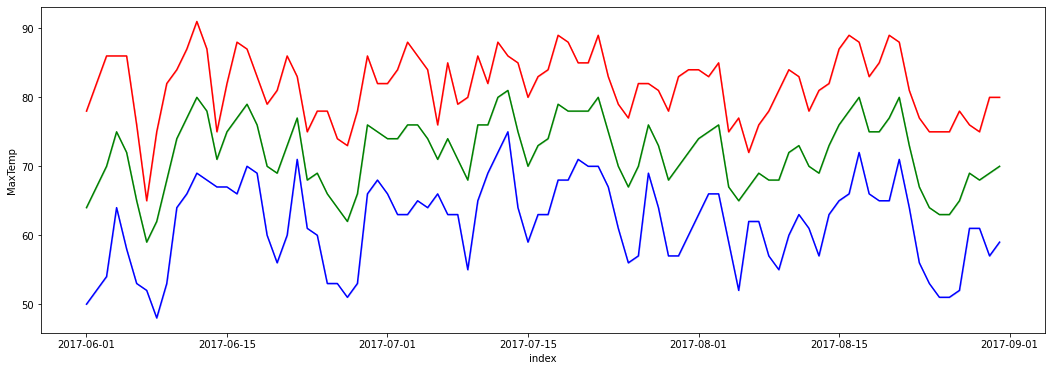

In [73]:
data = complete_data.loc[(complete_data['index'].dt.year == 2017) & (complete_data['Season'] == 'Summer')]
fig = plt.figure(figsize=(6*3, 6))
sns.lineplot(data=data, x='index', y='MaxTemp', color='r')
sns.lineplot(data=data, x='index', y='LowTemp', color='b')
sns.lineplot(data=data, x='index', y='AvgTemp', color='g')
# sns.relplot(data=data, x='index', y='MaxTemp','LowTemp', kind='line', aspect=3)

In [74]:
data = complete_data.copy(deep=True)
data['MaxGustNew'] = data['MaxGust'].replace('-', '0', regex=False)

# data.loc[data['MaxGustNew'].notna()]
complete_data['MaxGust'] = data['MaxGustNew']
complete_data['MaxGust'] = complete_data['MaxGust'].astype(np.float64)

In [76]:
complete_data['EventCategory'] = complete_data['EventCategory'].fillna('99')
complete_data['EventCategory'] = complete_data['EventCategory'].astype('category')
complete_data['DOW'] = complete_data['DOW'].astype('category')
complete_data['Month'] = complete_data['Month'].astype('category')
complete_data['hour'] = complete_data['hour'].astype('category')

In [77]:
complete_data['Precipitation'] = complete_data['Precipitation'].replace('T', '99', regex=False)
complete_data['Precipitation'] = complete_data['Precipitation'].astype(np.float64)

In [78]:
complete_data['Weekend'] = np.where((complete_data['DOW'] == 'Saturday') | (complete_data['DOW'] == 'Sunday'), 1, 0)

complete_data.sample(10)

,index,Season,Month,DOW,hour,HR,TimeOfDay,MaxTemp,AvgTemp,LowTemp,...,LowPressure,MaxVisibility,AvgVisibility,LowVisibility,MaxWindSpeed,AvgWindSpeed,MaxGust,Precipitation,EventCategory,Weekend
23360,2015-09-01,Fall,9,Tuesday,9,2258.0,Day,86,77,68,...,30.08,10,10,7,16,4,21.0,0.00,99.0,0
28025,2016-03-13,Spring,3,Sunday,18,1685.0,Day,59,55,50,...,29.74,8,3,0,14,9,19.0,0.57,2.0,1
14775,2014-09-08,Fall,9,Monday,16,2375.0,Day,79,66,53,...,30.04,10,10,10,12,6,17.0,0.00,99.0,0
15736,2014-10-18,Fall,10,Saturday,17,1669.0,Day,56,50,44,...,29.79,10,10,6,24,12,31.0,0.07,11.0,1
12631,2014-06-11,Summer,6,Wednesday,8,1910.0,Day,76,71,66,...,29.73,10,8,2,18,10,23.0,0.13,11.0,0
27688,2016-02-28,Winter,2,Sunday,17,1571.0,Day,64,53,41,...,29.59,10,10,10,33,19,44.0,99.00,11.0,1
18588,2015-02-14,Winter,2,Saturday,13,2255.0,Day,32,20,7,...,29.68,10,6,0,40,21,54.0,0.05,16.0,1
38804,2017-06-05,Summer,6,Monday,21,2274.0,Night,86,72,58,...,29.70,10,10,5,26,9,32.0,0.02,15.0,0
40199,2017-08-02,Summer,8,Wednesday,24,2213.0,Night,83,75,66,...,30.01,10,10,7,20,6,25.0,99.00,11.0,0
11291,2014-04-16,Spring,4,Wednesday,12,2173.0,Day,49,37,25,...,30.29,10,10,10,20,9,24.0,0.00,99.0,0


In [79]:
complete_data.rename(columns = {'HR':'load'}, inplace = True)
complete_data.dtypes

index             datetime64[ns]
Season                  category
Month                   category
DOW                     category
hour                    category
load                     float64
TimeOfDay               category
MaxTemp                    int64
AvgTemp                    int64
LowTemp                    int64
MaxDewPoint                int64
AvgDepPoint                int64
LowDewPoint                int64
MaxRelHumidity             int64
AvgRelHumidity             int64
LowHumidity                int64
MaxPressure              float64
AvgPressure              float64
LowPressure              float64
MaxVisibility              int64
AvgVisibility              int64
LowVisibility              int64
MaxWindSpeed               int64
AvgWindSpeed               int64
MaxGust                  float64
Precipitation            float64
EventCategory           category
Weekend                    int64
dtype: object

In [80]:
complete_data = complete_data.dropna()

In [81]:
# Let's just take a minimalistic number of fields for a simple model

data = complete_data[['Month','DOW','hour','load','AvgTemp', 'Weekend']]
data.dtypes

Month      category
DOW        category
hour       category
load        float64
AvgTemp       int64
Weekend       int64
dtype: object

<AxesSubplot:xlabel='AvgTemp', ylabel='load'>

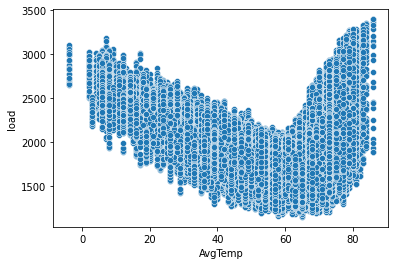

In [82]:
sns.scatterplot(data = data, x='AvgTemp',y='load')

In [83]:
# Let's make 24 data arrays to create 24 equations (one for each hour)
datas = []
for i in range(1,25):
    datas.append(data.loc[data['hour'] == i])
    
datas[0].head()
                          

,Month,DOW,hour,load,AvgTemp,Weekend
0,1,Tuesday,1,1723.0,26,0
24,1,Wednesday,1,1874.0,16,0
48,1,Thursday,1,2141.0,20,0
72,1,Friday,1,1989.0,24,0
96,1,Saturday,1,1961.0,28,1


In [84]:
# Let's add polynomial values for avgTemp
for d in datas:
    d.loc[:,'AvgTemp2'] = d.loc[:,'AvgTemp'].apply(lambda x: x**2)
    d.loc[:,'AvgTemp3'] = d.loc[:,'AvgTemp'].apply(lambda x: x**3)
    d.loc[:,'AvgTemp_weekend'] = d.loc[:,('AvgTemp', 'Weekend')].apply(lambda x: x['AvgTemp'] * x['Weekend'], axis=1)
    d.loc[:,'AvgTemp2_weekend'] = d.loc[:,('AvgTemp2', 'Weekend')].apply(lambda x: x['AvgTemp2'] * x['Weekend'], axis=1)
    d.loc[:,'AvgTemp3_weekend'] = d.loc[:,('AvgTemp3', 'Weekend')].apply(lambda x: x['AvgTemp3'] * x['Weekend'], axis=1)
datas[0].head()

/tmp/ipykernel_8764/720961836.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[:,'AvgTemp2'] = d.loc[:,'AvgTemp'].apply(lambda x: x**2)
/tmp/ipykernel_8764/720961836.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[:,'AvgTemp3'] = d.loc[:,'AvgTemp'].apply(lambda x: x**3)
/tmp/ipykernel_8764/720961836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Month,DOW,hour,load,AvgTemp,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend
0,1,Tuesday,1,1723.0,26,0,676,17576,0,0,0
24,1,Wednesday,1,1874.0,16,0,256,4096,0,0,0
48,1,Thursday,1,2141.0,20,0,400,8000,0,0,0
72,1,Friday,1,1989.0,24,0,576,13824,0,0,0
96,1,Saturday,1,1961.0,28,1,784,21952,28,784,21952


In [85]:
# Let's apply OneHotEncoding to DOW, Month in the data
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
ohe.fit(data[['Month', 'DOW']])

final_datas = []

for d in datas:
    ohe_values = ohe.transform(d[['Month','DOW']]).toarray()
    t_d = d.drop(['Month','DOW', 'hour'], axis=1)
    final_datas.append(np.concatenate((t_d.values, ohe_values), axis=1))
# final_datas[0]

In [86]:
for d in final_datas:
    print(d.shape)

(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)
(1826, 27)


In [87]:
final_datas[0][0]

array([1.7230e+03, 2.6000e+01, 0.0000e+00, 6.7600e+02, 1.7576e+04,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       1.0000e+00, 0.0000e+00])

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)

# Let's just do it for final_datas[0]

x_data = final_datas[0][:,1:]
y_data = final_datas[0][:,0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7444175793569383

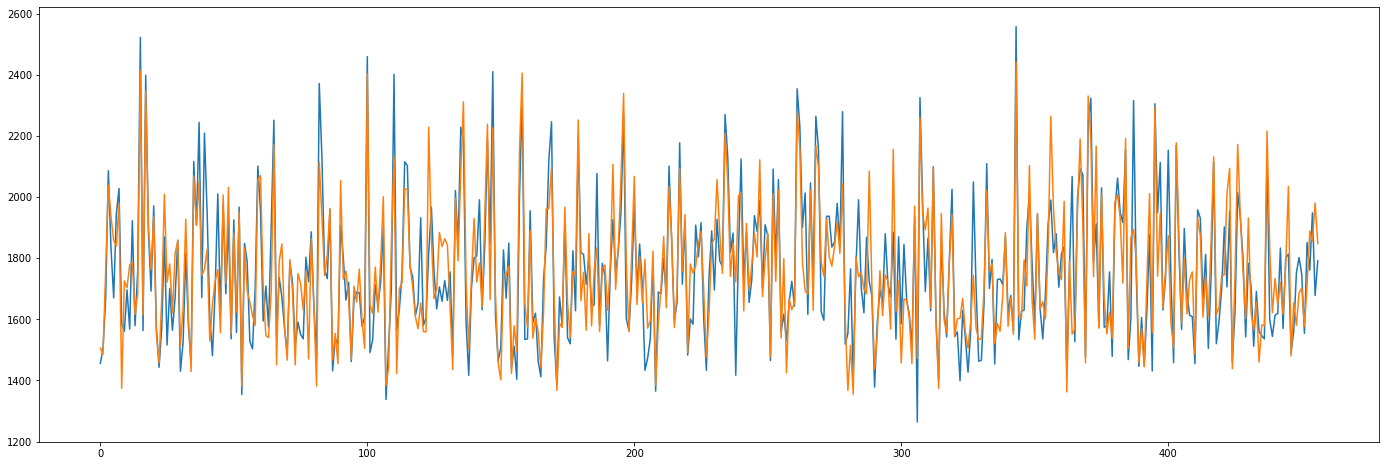

In [89]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))

<AxesSubplot:xlabel='AvgTemp', ylabel='load'>

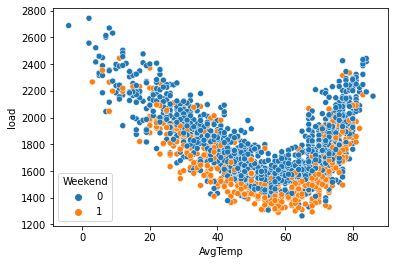

In [90]:
sns.scatterplot(data=datas[0], x='AvgTemp', y='load', hue='Weekend')

In [91]:
from sklearn.svm import SVR

model = SVR(kernel='sigmoid', max_iter=200)

# Let's just do it for final_datas[0]

x_data = final_datas[0][:,1:]
y_data = final_datas[0][:,0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

model.fit(x_train, y_train)

model.score(x_test, y_test)

/home/divyaksh/Documents/Coding/python/forecasting/venv/lib/python3.8/site-packages/sklearn/svm/_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=200).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


-0.09867264269558373

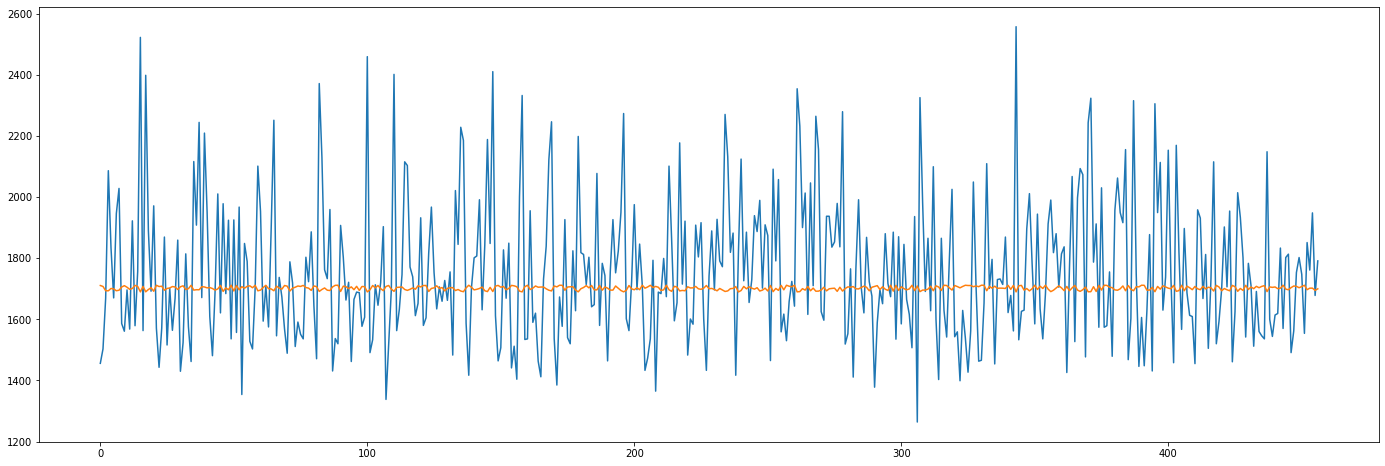

In [92]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))

In [93]:
datas[0].head()

,Month,DOW,hour,load,AvgTemp,Weekend,AvgTemp2,AvgTemp3,AvgTemp_weekend,AvgTemp2_weekend,AvgTemp3_weekend
0,1,Tuesday,1,1723.0,26,0,676,17576,0,0,0
24,1,Wednesday,1,1874.0,16,0,256,4096,0,0,0
48,1,Thursday,1,2141.0,20,0,400,8000,0,0,0
72,1,Friday,1,1989.0,24,0,576,13824,0,0,0
96,1,Saturday,1,1961.0,28,1,784,21952,28,784,21952


In [94]:
nn_datas = []

for d in datas:
    nn_datas.append(d[['Month','DOW','hour','load','AvgTemp','Weekend']])
    
nn_datas[0]

,Month,DOW,hour,load,AvgTemp,Weekend
0,1,Tuesday,1,1723.0,26,0
24,1,Wednesday,1,1874.0,16,0
48,1,Thursday,1,2141.0,20,0
72,1,Friday,1,1989.0,24,0
96,1,Saturday,1,1961.0,28,1
...,...,...,...,...,...,...
43704,12,Wednesday,1,2185.0,6,0
43728,12,Thursday,1,2273.0,9,0
43752,12,Friday,1,2114.0,16,0
43776,12,Saturday,1,2047.0,8,1


In [95]:
final_nn_datas = []
for d in nn_datas:
    ohe_values = pd.get_dummies(d[['Month','DOW']])
    t_d = d.drop(['Month','DOW','hour'], axis=1)
    final_nn_datas.append(pd.concat((t_d, ohe_values), axis=1))
    
final_nn_datas[0]

,load,AvgTemp,Weekend,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
0,1723.0,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,1874.0,16,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48,2141.0,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,1989.0,24,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,1961.0,28,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43704,2185.0,6,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
43728,2273.0,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
43752,2114.0,16,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
43776,2047.0,8,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [96]:
for d in datas:
    print(d.shape)

(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)
(1826, 11)


In [97]:
final_nn_datas[0]['load'].values.reshape(1,-1)

array([[1723., 1874., 2141., ..., 2114., 2047., 2266.]])

In [107]:
load_norm = StandardScaler()
load_d = load_norm.fit_transform(final_nn_datas[5]['load'].values.reshape(-1,1))
load_d = pd.DataFrame(load_d, columns=['load_norm'], index = range(0,43801, 24))

load_d

,load_norm
0,-0.367693
24,1.203018
48,1.873619
72,1.271154
96,0.844409
...,...
43704,2.167679
43728,2.189196
43752,1.486320
43776,0.941233


In [109]:
final_nn_datas[0]

,load,AvgTemp,Weekend,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
0,1723.0,26,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
24,1874.0,16,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
48,2141.0,20,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
72,1989.0,24,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
96,1961.0,28,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43704,2185.0,6,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
43728,2273.0,9,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
43752,2114.0,16,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
43776,2047.0,8,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [112]:
from sklearn.preprocessing import StandardScaler

final_norm_datas = []

for i, d in enumerate(final_nn_datas):
    load_norm = StandardScaler()
    load_d = load_norm.fit_transform(d['load'].values.reshape(-1,1))
    load_d = pd.DataFrame(load_d, columns=['load_norm'], index = range(i,43801+i, 24))
    
    temp_norm = StandardScaler()
    temp_d = temp_norm.fit_transform(d['AvgTemp'].values.reshape(-1,1))
    temp_d = pd.DataFrame(temp_d, columns=['temp_norm'], index = range(i,43801+i, 24))
    
    t_d = d.drop(['load','AvgTemp'], axis=1)
    
    final_norm_datas.append(pd.concat((load_d, temp_d, t_d), axis=1))

final_norm_datas[1]
    

    

,load_norm,temp_norm,Weekend,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Month_10,Month_11,Month_12,DOW_Friday,DOW_Monday,DOW_Saturday,DOW_Sunday,DOW_Thursday,DOW_Tuesday,DOW_Wednesday
1,-0.066995,-1.430696,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
25,0.637859,-1.953698,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
49,1.699237,-1.744497,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
73,1.031265,-1.535296,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
97,0.916522,-1.326095,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43705,1.949214,-2.476701,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
43729,2.264759,-2.319800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
43753,1.600886,-1.953698,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
43777,1.207479,-2.372100,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [125]:
from sklearn.svm import SVR

model = SVR(kernel='poly')

# Let's just do it for final_datas[0]

x_data = final_norm_datas[0].values[:,1:]
y_data = final_norm_datas[0].values[:,0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.7384308053569411

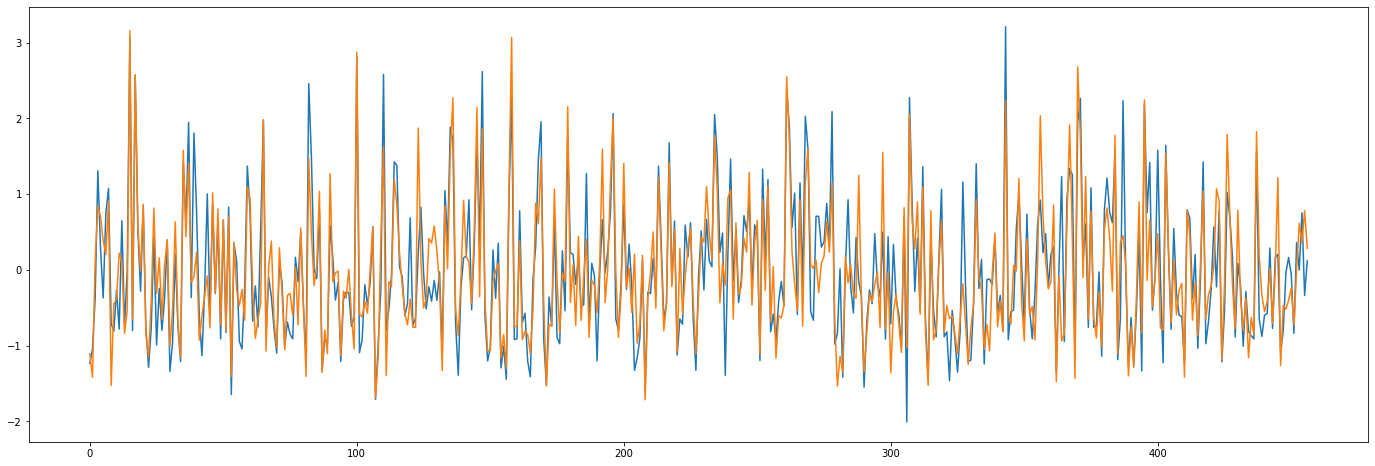

In [126]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))

In [119]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = False)

# Let's just do it for final_datas[0]

x_data = final_norm_datas[0].values[:,1:]
y_data = final_norm_datas[0].values[:,0]

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state=1)

model.fit(x_train, y_train)

model.score(x_test, y_test)

0.4816473627224348

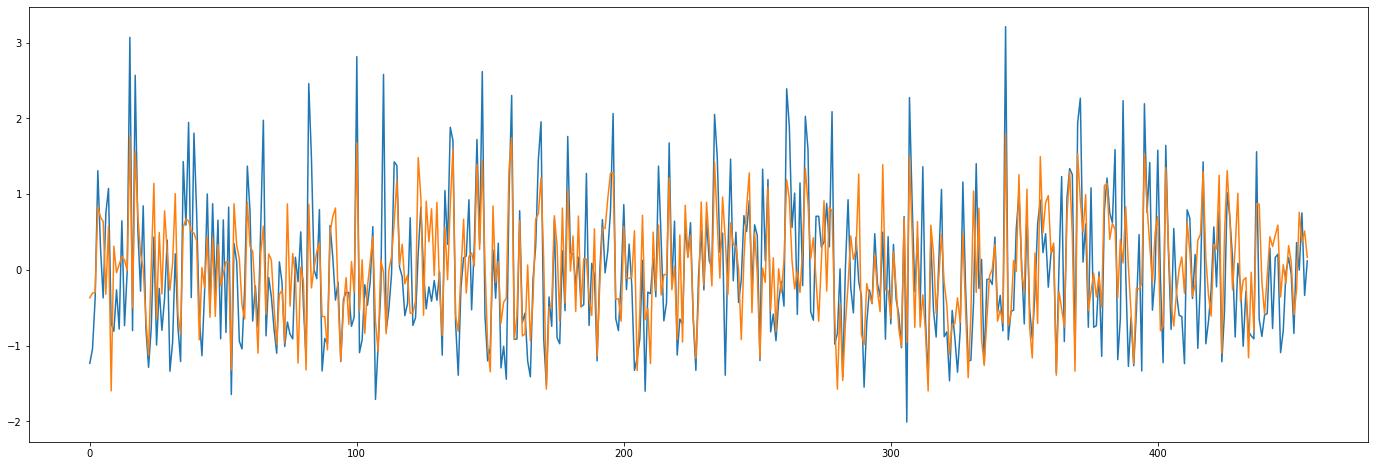

In [120]:
fig = plt.figure(figsize=(24,8))
plt.plot(y_test)
plt.plot(model.predict(x_test))